# TensorFlow2.0




在回归问题中，我们的目标是预测连续值的输出，如价格或概率。 

In [1]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


## 1.数据集


获取数据

In [2]:
#dataset_path = keras.utils.get_file('alldata.xlsx','alldata.xlsx')

#print(dataset_path)
#无需下载
dataset_path='alldata.csv'

使用pandas读取数据

In [3]:
column_names = ['year','place','month','Hg','Pb',
                'Cu', 'Zn', 'Se','As','Cd','Cr(VI)'] 
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                         na_values='?', comment='\t',
                         sep=',', skipinitialspace=True)
#raw_dataset = raw_dataset.astype('category')
origin_dataset = raw_dataset.copy()
origin_dataset.tail()

,year,place,month,Hg,Pb,Cu,Zn,Se,As,Cd,Cr(VI)
2426,2016,株洲市四水厂(枫溪),8,0.00001,0.002426,0.002011,0.0015,0.000305,0.008325,0.000015,0.002
2427,2016,株洲市四水厂(枫溪),9,0.00001,0.000115,0.00136,0.0015,0.000448,0.004323,0.000069,0.002
2428,2016,株洲市四水厂(枫溪),10,0.00001,0.000258,0.002017,0.0015,0.000285,0.005458,0.000161,0.002
2429,2016,株洲市四水厂(枫溪),11,0.00001,0.000179,0.001098,0.0015,0.00103,0.005365,0.000145,0.002
2430,2016,株洲市四水厂(枫溪),12,0.00001,0.000304,0.001171,0.00567,0.000274,0.007771,0.000256,0.002


## 2.数据预处理
### 清洗数据

In [4]:
print(origin_dataset.isna().sum())
origin_dataset = origin_dataset.dropna()
# origin = dataset.pop('Origin')
# dataset['USA'] = (origin == 1)*1.0
# dataset['Europe'] = (origin == 2)*1.0
# dataset['Japan'] = (origin == 3)*1.0
origin_dataset.tail()

year      0
place     0
month     0
Hg        0
Pb        0
Cu        0
Zn        0
Se        0
As        0
Cd        0
Cr(VI)    0
dtype: int64


,year,place,month,Hg,Pb,Cu,Zn,Se,As,Cd,Cr(VI)
2426,2016,株洲市四水厂(枫溪),8,0.00001,0.002426,0.002011,0.0015,0.000305,0.008325,0.000015,0.002
2427,2016,株洲市四水厂(枫溪),9,0.00001,0.000115,0.00136,0.0015,0.000448,0.004323,0.000069,0.002
2428,2016,株洲市四水厂(枫溪),10,0.00001,0.000258,0.002017,0.0015,0.000285,0.005458,0.000161,0.002
2429,2016,株洲市四水厂(枫溪),11,0.00001,0.000179,0.001098,0.0015,0.00103,0.005365,0.000145,0.002
2430,2016,株洲市四水厂(枫溪),12,0.00001,0.000304,0.001171,0.00567,0.000274,0.007771,0.000256,0.002


In [5]:
target='Zn'
structure='2layer64fullconnection'


dataset=pd.DataFrame(
    columns=['data1_year', 'data1_month','data1_value','data2_year','data2_month','data2_value','data_value'])


dataset['data1_year']=origin_dataset['year'].shift(2)
dataset['data1_month']=origin_dataset['month'].shift(2)
dataset['data1_value']=origin_dataset[target].shift(2)
dataset['data2_year']=origin_dataset['year'].shift(1)
dataset['data2_month']=origin_dataset['month'].shift(1)
dataset['data2_value']=origin_dataset[target].shift(1)
dataset['data_value']=origin_dataset[target]

dataset.tail()
print(dataset.isna().sum())
dataset = dataset.dropna() #去掉空数据行
dataset=dataset.drop(2,axis=0)  #去掉标题头
dataset['data1_year']=dataset['data1_year'].astype('int')
dataset['data1_month']=dataset['data1_month'].astype('int')
dataset['data1_value']=dataset['data1_value'].astype('float')
dataset['data2_year']=dataset['data2_year'].astype('int')
dataset['data2_month']=dataset['data2_month'].astype('int')
dataset['data2_value']=dataset['data2_value'].astype('float')
dataset['data_value']=dataset['data_value'].astype('float')
print(dataset.dtypes)




data1_year     2
data1_month    2
data1_value    2
data2_year     1
data2_month    1
data2_value    1
data_value     0
dtype: int64
data1_year       int32
data1_month      int32
data1_value    float64
data2_year       int32
data2_month      int32
data2_value    float64
data_value     float64
dtype: object


### 划分训练集和测试集

In [6]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_dataset.tail()
train_dataset.describe()

print(test_dataset.describe())

        data1_year  data1_month  data1_value   data2_year  data2_month  \
count   486.000000   486.000000   486.000000   486.000000   486.000000   
mean   2010.720165     6.563786     0.020194  2010.724280     6.528807   
std       3.321266     3.481771     0.024429     3.322232     3.495239   
min    2005.000000     1.000000     0.000000  2005.000000     1.000000   
25%    2008.000000     3.000000     0.009330  2008.000000     3.250000   
50%    2011.000000     7.000000     0.013330  2011.000000     7.000000   
75%    2014.000000    10.000000     0.025000  2014.000000     9.750000   
max    2016.000000    12.000000     0.310000  2016.000000    12.000000   

       data2_value  data_value  
count   486.000000  486.000000  
mean      0.021531    0.022245  
std       0.022512    0.027511  
min       0.000000    0.000000  
25%       0.010000    0.010000  
50%       0.014710    0.014415  
75%       0.025482    0.025000  
max       0.226670    0.323500  


### 检测数据

观察训练集中几对列的联合分布。

In [7]:
%matplotlib inline
%pylab inline
# sns.pairplot(train_dataset[["data_value","data1_year", "data2_month"]], diag_kind="kde")

Populating the interactive namespace from numpy and matplotlib


整体统计数据：

In [8]:

train_stats = train_dataset.describe()
train_stats.pop("data_value")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
data1_year,1942.0,2010.487642,3.460471,2005.0,2007.00000,2010.000000,2013.000000,2016.00000
data1_month,1942.0,6.488157,3.444207,1.0,4.00000,6.000000,9.000000,12.00000
data1_value,1942.0,0.024644,0.041443,0.0,0.00967,0.014000,0.026670,0.87733
data2_year,1942.0,2010.492276,3.460187,2005.0,2007.00000,2010.000000,2013.000000,2016.00000
data2_month,1942.0,6.502060,3.440185,1.0,4.00000,6.500000,9.750000,12.00000
data2_value,1942.0,0.024281,0.041740,0.0,0.00933,0.013415,0.026627,0.87733


### 取出标签

In [9]:
train_labels = train_dataset.pop("data_value")
test_labels = test_dataset.pop("data_value")

### 标准化数据
最好使用不同比例和范围的特征进行标准化。 虽然模型可能在没有特征归一化的情况下收敛，但它使训练更加困难，并且它使得结果模型依赖于输入中使用的单位的选择。

In [10]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)


print(normed_test_data)

      data1_year  data1_month  data1_value  data2_year  data2_month  \
3      -1.585808    -1.593446     0.772773   -1.587277    -1.308668   
6      -1.585808    -0.722418    -0.353344   -1.587277    -0.436622   
10     -1.585808     0.438953    -0.353344   -1.587277     0.726106   
27     -1.585808    -1.593446    -0.353344   -1.587277    -1.308668   
28     -1.585808    -1.303103    -0.353344   -1.587277    -1.017986   
...          ...          ...          ...         ...          ...   
2403    1.592950     0.148610    -0.417769    1.591742     0.435424   
2404    1.592950     0.438953    -0.449861    1.591742     0.726106   
2412    1.592950    -0.722418    -0.473990    1.591742    -0.436622   
2416    1.592950     0.438953    -0.558443    1.591742     0.726106   
2427    1.592950     0.148610    -0.538416    1.591742     0.435424   

      data2_value  
3       -0.182342  
6       -0.022781  
10      -0.102562  
27      -0.342143  
28       0.137019  
...           ...  
2403   

## 3.构建模型

In [11]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae', 'mse'])
    return model

In [12]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [13]:
example_batch = normed_train_data[:10]
example_label = train_labels[:10]
print(example_batch.dtypes)
example_result = model.predict(example_batch)
print(example_result)
example_label

data1_year     float64
data1_month    float64
data1_value    float64
data2_year     float64
data2_month    float64
data2_value    float64
dtype: object


[[ 0.08678447]
 [ 0.07681216]
 [-0.01578103]
 [ 0.00056951]
 [-0.1676316 ]
 [-0.02101734]
 [ 0.12019857]
 [-0.02221031]
 [ 0.04140722]
 [ 0.21907075]]


2057    0.01100
746     0.00500
2302    0.03400
1537    0.00233
1844    0.01367
624     0.00400
2331    0.01883
1081    0.01000
1178    0.02200
967     0.02333
Name: data_value, dtype: float64

## 4.训练模型

In [14]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


..

.

..

.

..

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

查看训练记录

In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.000546,0.010983,0.000546,0.004080,0.020832,0.004080,495
496,0.000549,0.010837,0.000549,0.004171,0.020937,0.004171,496
497,0.000563,0.011148,0.000563,0.004123,0.020158,0.004123,497
498,0.000555,0.010578,0.000555,0.004430,0.024644,0.004430,498
499,0.000549,0.011202,0.000549,0.004022,0.020434,0.004022,499


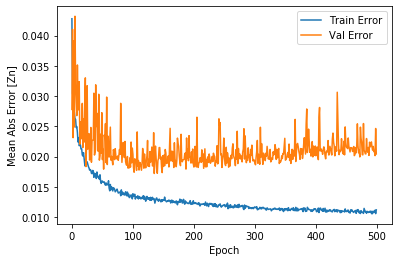

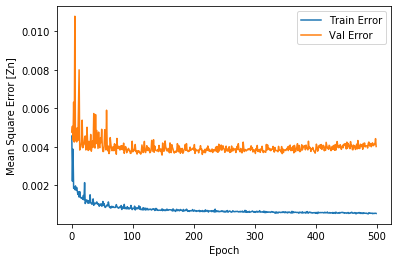

In [17]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error'+" ["+target+"]")
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    #plt.ylim([0,5])
    plt.legend()
    plt.savefig('E:\\蒋东益水质预测神经网络结果集\\结果图片\\'+target+"\\"+target+" MAE with "+structure+".png",dpi=200, bbox_inches='tight')

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error'+" ["+target+"]")
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    #plt.ylim([0,20])
    plt.legend()
    plt.savefig('E:\\蒋东益水质预测神经网络结果集\\结果图片\\'+target+"\\"+target+" MSE with "+structure+".png",dpi=200, bbox_inches='tight')
    plt.show()
    


plot_history(history)

使用early stop

In [18]:
# model = build_model()
# 
# 
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# 
# history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
#                     validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])
# 
# plot_history(history)

测试

In [19]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.5f}".format(mae))


Testing set Mean Abs Error: 0.01655


# 5.预测

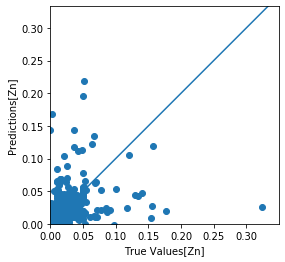

In [21]:
test_predictions = model.predict(normed_test_data).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values'+"["+target+"]")
plt.ylabel('Predictions'+"["+target+"]")
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.savefig('E:\\蒋东益水质预测神经网络结果集\\结果图片\\'+target+"\\"+target+" Distribution of results with "+structure+".png",dpi=200, bbox_inches='tight')

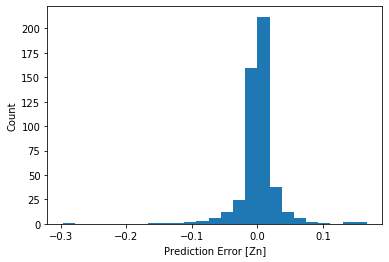

In [22]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error ["+target+"]")
_ = plt.ylabel("Count")
plt.savefig('E:\\蒋东益水质预测神经网络结果集\\结果图片\\'+target+"\\"+target+" Error count with "+structure+".png",dpi=200, bbox_inches='tight')